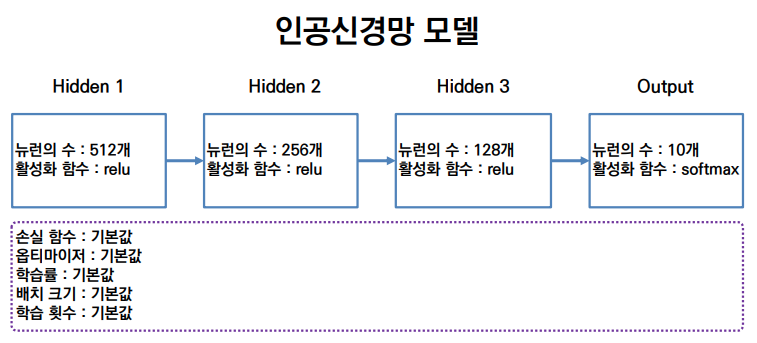

In [1]:
import cv2
import numpy as np

In [3]:
img = cv2.imread("digits.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)

(1000, 2000)


In [4]:
cells = [np.hsplit(row, 100) for row in np.vsplit(img, 50)]
x = np.array(cells)
print(x.shape)

(50, 100, 20, 20)


In [6]:
X = x.reshape(-1, 400)
y = np.repeat(np.arange(10), 500)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(512,256, 128), verbose=True)
model.fit(train_X, train_y)
print(model.score(test_X, test_y))

Iteration 1, loss = 8.91942206
Iteration 2, loss = 1.40567523
Iteration 3, loss = 0.50471513
Iteration 4, loss = 0.21700384
Iteration 5, loss = 0.08847421
Iteration 6, loss = 0.03264518
Iteration 7, loss = 0.01240597
Iteration 8, loss = 0.00570284
Iteration 9, loss = 0.00378147
Iteration 10, loss = 0.00372553
Iteration 11, loss = 0.00133165
Iteration 12, loss = 0.00070552
Iteration 13, loss = 0.00049934
Iteration 14, loss = 0.00045127
Iteration 15, loss = 0.00042459
Iteration 16, loss = 0.00040731
Iteration 17, loss = 0.00039282
Iteration 18, loss = 0.00038247
Iteration 19, loss = 0.00037250
Iteration 20, loss = 0.00036445
Iteration 21, loss = 0.00035718
Iteration 22, loss = 0.00035126
Iteration 23, loss = 0.00034514
Iteration 24, loss = 0.00033996
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.924


In [15]:
img4 = cv2.imread("four.png",0)
cv2.imshow("4", img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
number = img4.reshape(-1, 400)
print(model.predict_proba(number))
print(np.argmax(model.predict_proba(number)))
print(model.predict(number))

[[3.92879988e-31 4.96574854e-03 1.16104292e-28 3.19726007e-17
  9.95034251e-01 1.17201188e-26 2.10965514e-13 3.12195424e-31
  2.33035838e-28 6.78961783e-41]]
4
[4]


In [17]:
import pickle

In [18]:
with open("number.model", "wb") as f:
    pickle.dump(model, f)

In [19]:
import pickle
with open("number.model", "rb") as f:
    model = pickle.load(f)

print(model.predict_proba(number))
print(model.predict(number))

[[3.92879988e-31 4.96574854e-03 1.16104292e-28 3.19726007e-17
  9.95034251e-01 1.17201188e-26 2.10965514e-13 3.12195424e-31
  2.33035838e-28 6.78961783e-41]]
[4]


In [28]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

In [45]:
cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, bin_img = cv2.threshold(g_img, 110, 255, cv2.THRESH_BINARY_INV)
            contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            try:
                for contour in contours:
                    (x,y), radius = cv2.minEnclosingCircle(contour)
                    if radius > 5:
                        xs, xe = int(x-radius), int(x+radius)
                        ys, ye = int(y-radius), int(y+radius)
                        cv2.rectangle(bin_img, (xs,ys), (xe,ye), (200,0,0), 1)
                        roi = bin_img[ys:ye, xs:xe]
                        roi = cv2.resize(roi, dsize=(50,50))
                        roi = cv2.resize(roi, dsize=(16,16))
                        A = np.zeros((20,20))
                        A[2:-2,2:-2] = roi
                        A = A.reshape(-1,400)
                        num = model.predict(A)
                        cv2.putText(bin_img, str(num), (xs, ys), cv2.FONT_HERSHEY_PLAIN, 2, (200,0,0))
            except Exception as e:
                print(e)

            cv2.imshow("Image", bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
        else:
            print("No Frame")
            break
else:
    print("Camera not opened")

cap.release()
cv2.destroyAllWindows()